In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle

In [4]:
# Load the dataset
df = pd.read_excel(r'c:\\Users\\Gowtham\\OneDrive\\Desktop\\SEM -4 Projects\\ML\\Judgment_Embeddings_InLegalBERT.xlsx')

# Display dataset information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

Dataset Shape: (3229, 769)
Columns: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_759', 'feature_760', 'feature_761', 'feature_762',
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'Label'],
      dtype='object', length=769)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [6]:
print("Missing Values:\n", df.isnull().sum().sum())
if df.isnull().sum().sum() > 0:
    df = df.dropna()

Missing Values:
 0


In [7]:
X = df.drop(columns=["Label"])
y = df["Label"]

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize features (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.decomposition import PCA

# Reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca.shape[1]}")


Reduced dimensions: 288


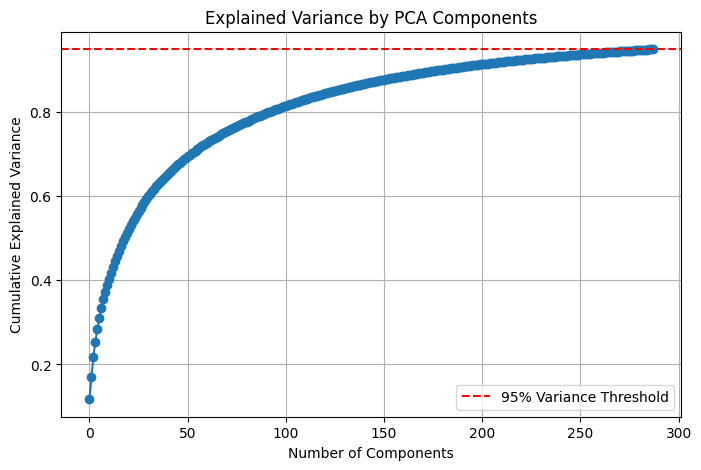

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# After fitting PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y) # Changed df_pca to X_pca

# Optional: check new class distribution
from collections import Counter
print(Counter(y_resampled))

Counter({0: 1366, 1: 1366, 2: 1366, 3: 1366, 6: 1366, 5: 1366, 4: 1366, 13: 1366, 8: 1366, 9: 1366, 7: 1366, 10: 1366, 12: 1366, 11: 1366})


C:\Users\Gowtham\AppData\Local\Temp\ipykernel_26704\3894008471.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(original_dist.keys()), y=list(original_dist.values()), ax=axes[0], palette="pastel")
C:\Users\Gowtham\AppData\Local\Temp\ipykernel_26704\3894008471.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resampled_dist.keys()), y=list(resampled_dist.values()), ax=axes[1], palette="deep")


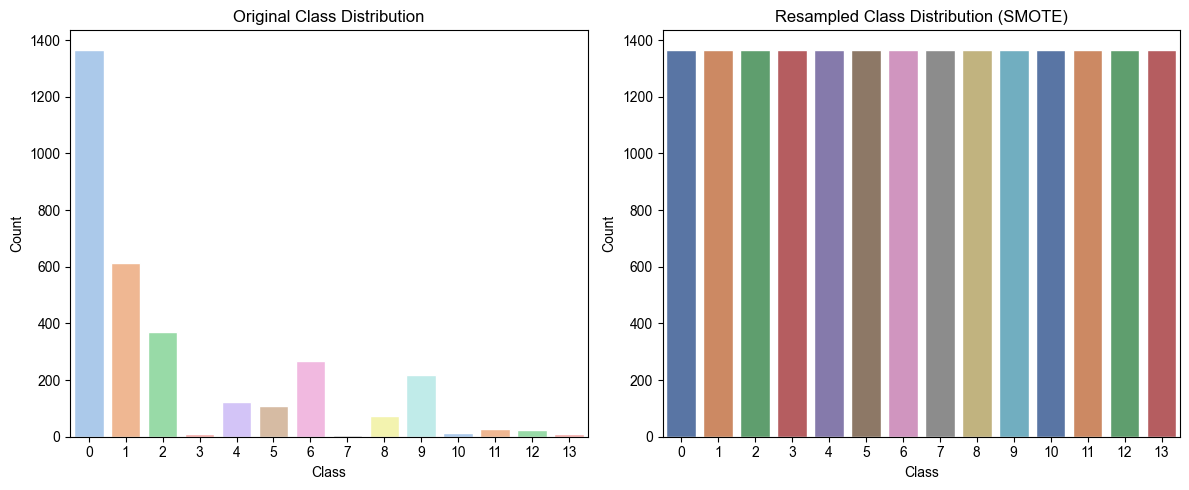

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# 📊 Original class distribution
original_dist = Counter(y)
resampled_dist = Counter(y_resampled)

# Prepare data for plotting
dist_df = {
    "Original": original_dist,
    "Resampled (SMOTE)": resampled_dist
}

# Create a bar plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Plot original distribution
sns.barplot(x=list(original_dist.keys()), y=list(original_dist.values()), ax=axes[0], palette="pastel")
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Plot resampled distribution
sns.barplot(x=list(resampled_dist.keys()), y=list(resampled_dist.values()), ax=axes[1], palette="deep")
axes[1].set_title("Resampled Class Distribution (SMOTE)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top K features based on ANOVA F-value
k = 768  # You can choose any value based on your needs
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices or names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected features:", list(selected_features))


Selected features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_7

XG Boost and Logistic Regression


🔹 Logistic Regression (With SMOTE):
Training Accuracy: 0.9462709981044513
Testing Accuracy: 0.934640522875817
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.77      0.56      0.65       273
           1       0.91      0.81      0.86       273
           2       0.89      0.93      0.91       273
           3       0.99      1.00      0.99       274
           4       0.91      0.97      0.94       273
           5       0.89      0.97      0.93       273
           6       0.98      0.99      0.98       274
           7       1.00      1.00      1.00       273
           8       0.92      0.99      0.95       273
           9       0.83      0.88      0.86       273
          10       0.99      1.00      1.00       274
          11       0.99      1.00      0.99       273
          12       0.97      1.00      0.99       273
          13       1.00      1.00      1.00       273

    accuracy                           0.93    

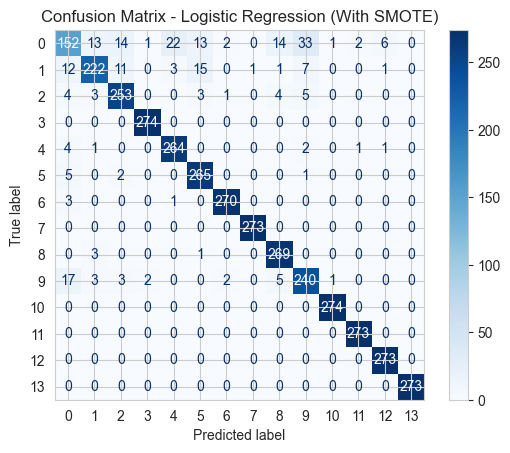


🔹 XGBoost (With SMOTE):
Training Accuracy: 0.9997385450029413
Testing Accuracy: 0.9715032679738562
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       273
           1       0.94      0.90      0.92       273
           2       0.94      0.98      0.96       273
           3       1.00      1.00      1.00       274
           4       0.95      0.99      0.97       273
           5       0.97      0.99      0.98       273
           6       0.98      0.99      0.99       274
           7       1.00      1.00      1.00       273
           8       0.99      0.99      0.99       273
           9       0.95      0.98      0.96       273
          10       1.00      1.00      1.00       274
          11       1.00      1.00      1.00       273
          12       1.00      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.97      3825
   

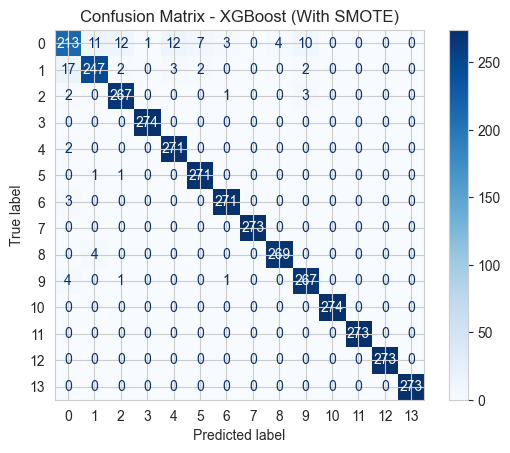

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ------------------- 1. Logistic Regression -------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression (With SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (With SMOTE)")
plt.show()

# ------------------- 2. XGBoost Classifier -------------------
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost (With SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost (With SMOTE)")
plt.show()

Random Forest

Training Accuracy: 0.9997385450029413
🔹 Random Forest Results (With SMOTE):
Testing Accuracy: 0.967843137254902
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.71      0.78       273
           1       0.94      0.91      0.92       273
           2       0.91      0.99      0.95       273
           3       1.00      1.00      1.00       274
           4       0.94      0.99      0.97       273
           5       0.98      0.99      0.98       273
           6       0.99      0.99      0.99       274
           7       1.00      1.00      1.00       273
           8       0.97      0.99      0.98       273
           9       0.93      0.99      0.96       273
          10       1.00      1.00      1.00       274
          11       0.99      1.00      1.00       273
          12       1.00      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.97  

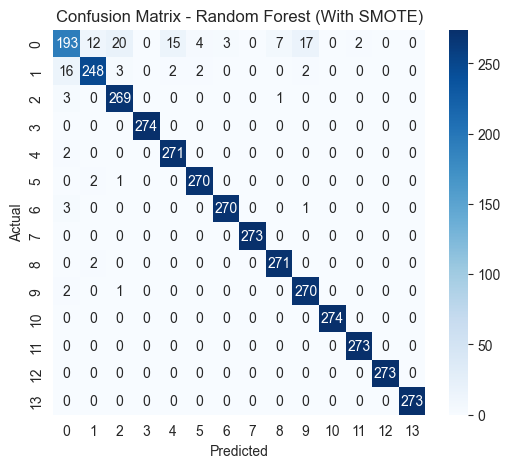

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 🔧 Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Training accuracy using rf_model
y_train_pred_rf = rf_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))

# 🎯 Predict on test set
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluation
print("🔹 Random Forest Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_rf))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM

Training Accuracy: 0.8828027975684686
🔹 SVM Results (With SMOTE):
Testing Accuracy: 0.8739869281045751
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.57      0.44      0.49       273
           1       0.81      0.81      0.81       273
           2       0.79      0.78      0.78       273
           3       1.00      1.00      1.00       274
           4       0.85      0.87      0.86       273
           5       0.79      0.72      0.75       273
           6       0.94      0.97      0.96       274
           7       1.00      1.00      1.00       273
           8       0.84      0.93      0.88       273
           9       0.71      0.72      0.71       273
          10       0.99      1.00      0.99       274
          11       0.96      1.00      0.98       273
          12       0.92      0.99      0.95       273
          13       0.99      1.00      1.00       273

    accuracy                           0.87      3825


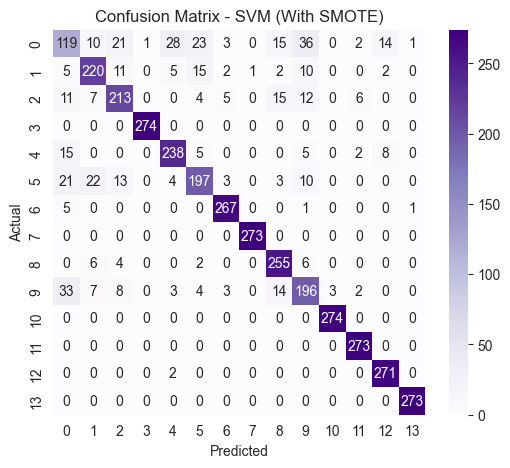

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 🔧 Train an SVM classifier
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# ✅ Training accuracy using svm_model
y_train_pred_svm = svm_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))

# 🎯 Predict on test set
y_pred_svm = svm_model.predict(X_test)

# 📊 Evaluation
print("🔹 SVM Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_svm))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree

Training Accuracy: 0.9997385450029413
🔹 Decision Tree Results (With SMOTE):
Testing Accuracy: 0.8661437908496732
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.39       273
           1       0.71      0.71      0.71       273
           2       0.77      0.83      0.80       273
           3       1.00      1.00      1.00       274
           4       0.84      0.90      0.87       273
           5       0.78      0.85      0.81       273
           6       0.91      0.92      0.91       274
           7       1.00      1.00      1.00       273
           8       0.90      0.91      0.91       273
           9       0.72      0.77      0.75       273
          10       0.97      0.99      0.98       274
          11       0.97      0.96      0.97       273
          12       0.96      0.96      0.96       273
          13       0.99      1.00      0.99       273

    accuracy                           0.87      38

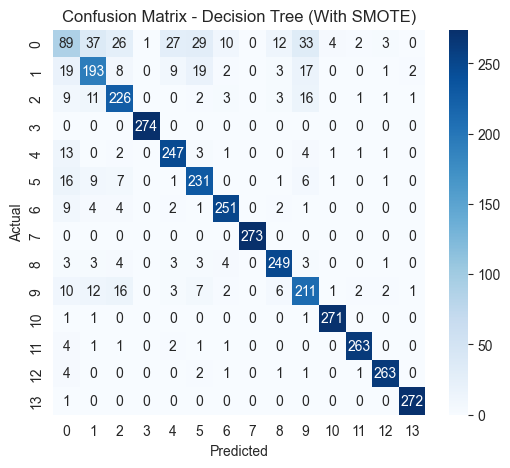

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 🔧 Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# ✅ Training accuracy using dt_model
y_train_pred_dt = dt_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))

# 🎯 Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# 📊 Evaluate the model
print("🔹 Decision Tree Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


KNN

Training Accuracy: 0.9360742532191646
🔹 k-NN Results (With SMOTE):
Testing Accuracy: 0.9226143790849674
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.10      0.17       273
           1       0.93      0.85      0.89       273
           2       0.94      0.97      0.95       273
           3       0.97      1.00      0.99       274
           4       0.84      1.00      0.91       273
           5       0.82      1.00      0.90       273
           6       0.97      1.00      0.99       274
           7       1.00      1.00      1.00       273
           8       0.91      1.00      0.95       273
           9       0.83      1.00      0.91       273
          10       0.95      1.00      0.98       274
          11       0.99      1.00      1.00       273
          12       0.91      1.00      0.95       273
          13       1.00      1.00      1.00       273

    accuracy                           0.92      3825
   mac

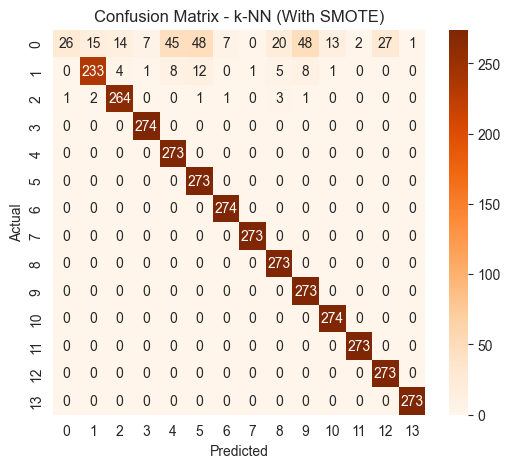

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 1: Initialize k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model
knn_model.fit(X_train, y_train)

# ✅ Training accuracy using knn_model
y_train_pred_knn = knn_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))

# Step 3: Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluation
print("🔹 k-NN Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - k-NN (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AdaBoost

C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.7634485914112034
🔹 Improved AdaBoost Results (With SMOTE):
Testing Accuracy: 0.7220915032679739
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.52      0.37       273
           1       0.59      0.73      0.66       273
           2       0.69      0.47      0.56       273
           3       1.00      0.93      0.97       274
           4       0.74      0.46      0.57       273
           5       0.56      0.52      0.54       273
           6       0.99      0.80      0.88       274
           7       1.00      1.00      1.00       273
           8       0.96      0.77      0.85       273
           9       0.37      0.75      0.50       273
          10       0.99      0.71      0.83       274
          11       1.00      0.88      0.93       273
          12       1.00      0.60      0.75       273
          13       1.00      0.98      0.99       273

    accuracy                           0.72    

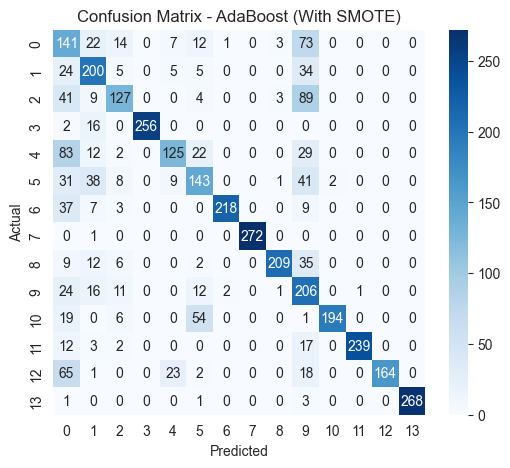

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 1: Initialize Improved AdaBoost
base_model = DecisionTreeClassifier(max_depth=3)  # Increased depth
adaboost_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=200,         # More boosting rounds
    learning_rate=0.5,        # Reduced learning rate
    random_state=42
)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train)

# ✅ Training accuracy
y_train_pred_ada = adaboost_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_ada))

# Step 3: Predict on test set
y_pred_ada = adaboost_model.predict(X_test)

# Step 4: Evaluation
print("🔹 Improved AdaBoost Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

CatBoost

Training Accuracy: 0.9401921694228381
🔹 CatBoost Results (With SMOTE):
Testing Accuracy: 0.9134640522875817
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.61       273
           1       0.85      0.81      0.83       273
           2       0.80      0.89      0.84       273
           3       1.00      1.00      1.00       274
           4       0.89      0.95      0.92       273
           5       0.87      0.86      0.87       273
           6       0.95      0.98      0.96       274
           7       1.00      1.00      1.00       273
           8       0.91      0.97      0.94       273
           9       0.78      0.81      0.80       273
          10       1.00      1.00      1.00       274
          11       0.96      1.00      0.98       273
          12       0.99      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.91      3825
  

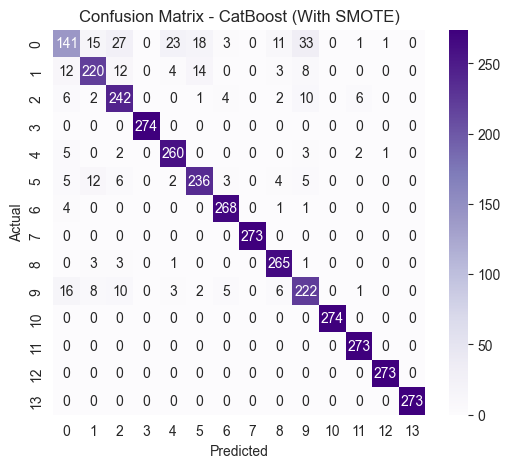

In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 1: Initialize CatBoost (silent mode to suppress output)
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Step 2: Train the model
cat_model.fit(X_train, y_train)

# ✅ Training accuracy using cat_model
y_train_pred_cat = cat_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_cat))

# Step 3: Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Step 4: Evaluation
print("🔹 CatBoost Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - CatBoost (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NAVIE BAYES


🔹 Naive Bayes Results (With SMOTE):
Training Accuracy: 0.741355644159749
Testing Accuracy: 0.7362091503267973
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.38      0.43       273
           1       0.75      0.57      0.65       273
           2       0.48      0.65      0.55       273
           3       1.00      0.96      0.98       274
           4       0.57      0.67      0.61       273
           5       0.41      0.40      0.40       273
           6       0.95      0.90      0.93       274
           7       0.99      0.98      0.99       273
           8       0.74      0.85      0.79       273
           9       0.45      0.62      0.52       273
          10       0.92      0.81      0.86       274
          11       0.94      0.95      0.94       273
          12       0.91      0.67      0.77       273
          13       1.00      0.90      0.95       273

    accuracy                           0.74      3825


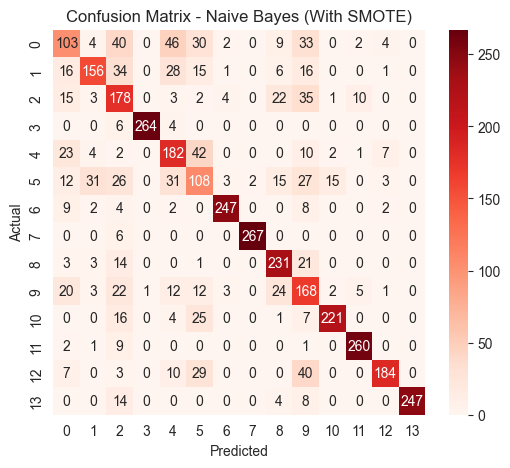

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 1: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 2: Train the model
nb_model.fit(X_train, y_train)

# Step 3: Predict on both training and test sets
y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Step 4: Evaluation
print("🔹 Naive Bayes Results (With SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Naive Bayes (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

MLP

Training Accuracy: 0.997320086280149
🔹 MLP Classifier Results (With SMOTE):
Testing Accuracy: 0.966797385620915
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       273
           1       0.88      0.91      0.90       273
           2       0.96      0.99      0.98       273
           3       1.00      1.00      1.00       274
           4       0.93      0.98      0.95       273
           5       0.97      1.00      0.99       273
           6       0.98      0.99      0.99       274
           7       1.00      1.00      1.00       273
           8       0.98      0.99      0.98       273
           9       0.93      1.00      0.96       273
          10       1.00      1.00      1.00       274
          11       1.00      1.00      1.00       273
          12       1.00      1.00      1.00       273
          13       1.00      1.00      1.00       273

    accuracy                           0.97  

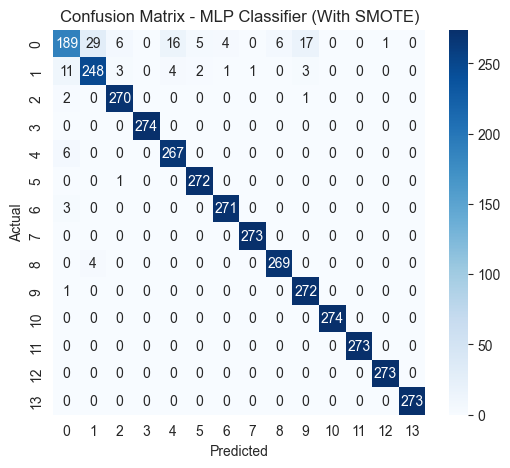

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 🧪 Train-test split (with SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Scale features (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Training accuracy using mlp_model
y_train_pred_mlp = mlp_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_mlp))

# Predict on test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation
print("🔹 MLP Classifier Results (With SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP Classifier (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
!pip install tabulate

Error processing line 1 of C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\vision-1.0.0-py3.11-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Gowtham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate  # Install with: pip install tabulate

# ✅ Include predictions for models trained with SMOTE
all_model_preds = {
    "Random Forest": (y_train_pred_rf, y_pred_rf),
    "SVM": (y_train_pred_svm, y_pred_svm),
    "Decision Tree": (y_train_pred_dt, y_pred_dt),
    "k-NN": (y_train_pred_knn, y_pred_knn),
    "AdaBoost (Improved)": (y_train_pred_ada, y_pred_ada),
    "CatBoost": (y_train_pred_cat, y_pred_cat),
    "Naive Bayes": (y_train_pred_nb, y_pred_nb),
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr),
    "XGBoost": (y_train_pred_xgb, y_test_pred_xgb),
    "MLP Classifier": (y_train_pred_mlp, y_pred_mlp)
}

# 📊 Collect metrics for both training and testing
metrics_rows = []
for model_name, (train_pred, test_pred) in all_model_preds.items():
    row = [
        model_name,
        # Training Metrics
        round(accuracy_score(y_train, train_pred), 4),
        # Testing Metrics
        round(accuracy_score(y_test, test_pred), 4),
        round(precision_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        round(recall_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        round(f1_score(y_test, test_pred, average='weighted', zero_division=0), 4)
    ]
    metrics_rows.append(row)

# 📄 Print table using tabulate
headers = [
    "Model",
    "Train Accuracy",
    "Test Accuracy", "Precision", "Recall", "F1 Score"
]

print("📊 Final Model Comparison (Train & Test):\n")
print(tabulate(metrics_rows, headers=headers, tablefmt="github"))

📊 Final Model Comparison (Train & Test):

| Model               |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|---------------------|------------------|-----------------|-------------|----------|------------|
| Random Forest       |           0.9997 |          0.9678 |      0.9671 |   0.9678 |     0.9666 |
| SVM                 |           0.8828 |          0.874  |      0.8678 |   0.874  |     0.8698 |
| Decision Tree       |           0.9997 |          0.8661 |      0.8588 |   0.8661 |     0.8608 |
| k-NN                |           0.9361 |          0.9226 |      0.9293 |   0.9226 |     0.8983 |
| AdaBoost (Improved) |           0.7634 |          0.7221 |      0.7983 |   0.7221 |     0.7416 |
| CatBoost            |           0.9402 |          0.9135 |      0.9106 |   0.9135 |     0.9102 |
| Naive Bayes         |           0.7414 |          0.7362 |      0.7563 |   0.7362 |     0.7406 |
| Logistic Regression |           0.9463 |          0.9346 |      0